# Classification de documents

## Imports

In [5]:
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import seaborn as sn
from pprint import pprint
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
##from scikitplot.metrics import plot_confusion_matrix
import pandas as pd
import re
import operator
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Ing Armel
[nltk_data]     Fopa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Charger le dataset 20 newsgroups
Pour plus d'information : https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html

In [6]:
# On sélectionne quelques catégories pour simplifier le problème
categories = [
    'comp.graphics',
    'rec.sport.hockey',
    'sci.space',
    'talk.politics.mideast'
]

# Chargement du corpus d'entraînement
newsgroups_train = fetch_20newsgroups(
    subset='train',
    categories=categories,
    remove=('headers', 'footers', 'quotes')
)

# Chargement du corpus de test
newsgroups_test = fetch_20newsgroups(
    subset='test',
    categories=categories,
    remove=('headers', 'footers', 'quotes')
)

print("Nombre de documents d'entraînement :", len(newsgroups_train.data))
print("Nombre de documents de test        :", len(newsgroups_test.data))
print("Catégories :", newsgroups_train.target_names)

Nombre de documents d'entraînement : 2341
Nombre de documents de test        : 1558
Catégories : ['comp.graphics', 'rec.sport.hockey', 'sci.space', 'talk.politics.mideast']


Affichage d'un exemple de texte

In [10]:
i = 0
print("Catégorie :", newsgroups_train.target_names[newsgroups_train.target[i]])
print("\nTexte :\n")
print(newsgroups_train.data[i][:1000])

Catégorie : comp.graphics

Texte :

: 8~> I require BGI drivers for Super VGA Displays and Super XVGA Displays. Does 
: 8~> anyone know where I could obtain the relevant drivers ? (FTP sites ??)

: 	I would like to know too!

: Regards,
: Dominic

garbo.uwasa.fi (or one of its many mirrors) has a file
called "svgabg40" in the programming subdirectory.
These are svga bgi drivers for a variety of cards.

[from the README]:
"Card types supported: (SuperVGA drivers)
  Ahead, ATI, Chips & Tech, Everex, Genoa, Paradise, Oak, Trident (both 8800 
  and 8900, 9000), Tseng (both 3000 and 4000 chipsets) and Video7.
  These drivers will also work on video cards with VESA capability.
  The tweaked drivers will work on any register-compatible VGA card."

enjoy,
Clark Verbrugge
clump@cs.mcgill.ca

--


Creation du pipeline TF-IDF + Naives bayes

In [11]:
text_clf = Pipeline([
    ('tfidf', TfidfVectorizer(
        stop_words='english',
        max_df= 0.8,
        min_df= 5
    )),
    ('clf', MultinomialNB())
])

Entrainement du modele dur les données d'entrainement

In [14]:
text_clf.fit(newsgroups_train.data, newsgroups_train.target)


,steps,"[('tfidf', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


Prediction et evaluation sur les donnees de test

In [15]:
#Prediction sur le jeu de test
y_pred = text_clf.predict(newsgroups_test.data)

#Score global de precision
accuracy = np.mean(y_pred == newsgroups_test.target)
print(f"Precision globale : {accuracy:.3f}")

Precision globale : 0.906


Rapport de classification

In [16]:
print(classification_report(newsgroups_test.target, 
                            y_pred,
                            target_names=newsgroups_test.target_names))

                       precision    recall  f1-score   support

        comp.graphics       0.90      0.92      0.91       389
     rec.sport.hockey       0.88      0.96      0.92       399
            sci.space       0.92      0.82      0.87       394
talk.politics.mideast       0.92      0.92      0.92       376

             accuracy                           0.91      1558
            macro avg       0.91      0.91      0.91      1558
         weighted avg       0.91      0.91      0.90      1558



Test sur un exemple manuel

In [17]:
# Exemple 1 : un message sur le sport
sample_text = ["The team scored two goals and won the hockey match after a tough game."]
pred = text_clf.predict(sample_text)
print("Texte :", sample_text[0])
print("→ Catégorie prédite :", newsgroups_train.target_names[pred[0]])

# Exemple 2 : un message spatial
sample_text2 = ["NASA launched a new satellite to study the solar system."]
pred2 = text_clf.predict(sample_text2)
print("\nTexte :", sample_text2[0])
print("→ Catégorie prédite :", newsgroups_train.target_names[pred2[0]])

Texte : The team scored two goals and won the hockey match after a tough game.
→ Catégorie prédite : rec.sport.hockey

Texte : NASA launched a new satellite to study the solar system.
→ Catégorie prédite : sci.space


Matrice de confusion

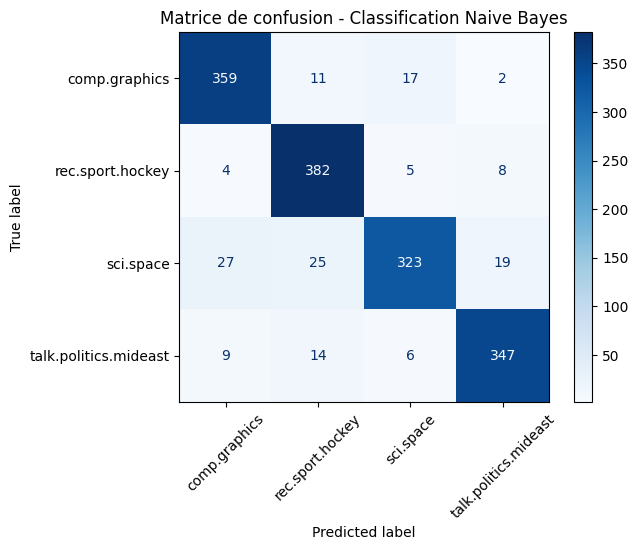

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Génération et affichage de la matrice de confusion
cm_display = ConfusionMatrixDisplay.from_predictions(
    newsgroups_test.target,
    y_pred,
    display_labels=newsgroups_test.target_names,
    cmap='Blues',
    xticks_rotation=45
)

plt.title("Matrice de confusion - Classification Naive Bayes")


plt.show()
